<p style="font-size:32px">KnowleDGAble: Know Legitimate from DGA</p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Legitimate:-Alexa-Top-1M-Data" data-toc-modified-id="Legitimate:-Alexa-Top-1M-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Legitimate: Alexa Top 1M Data</a></span></li><li><span><a href="#Malicious:-DGA-Data" data-toc-modified-id="Malicious:-DGA-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Malicious: DGA Data</a></span></li><li><span><a href="#Create-labeled-dataset" data-toc-modified-id="Create-labeled-dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Create labeled dataset</a></span></li><li><span><a href="#Extract-Features" data-toc-modified-id="Extract-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Extract Features</a></span></li></ul></li><li><span><a href="#Approach" data-toc-modified-id="Approach-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Approach</a></span><ul class="toc-item"><li><span><a href="#Considerations" data-toc-modified-id="Considerations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Considerations</a></span></li></ul></li><li><span><a href="#References-and-Further-Reading" data-toc-modified-id="References-and-Further-Reading-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References and Further Reading</a></span></li></ul></div>

# Problem Statement

Take a user input as a domain name and find out if it is a valid domain or auto generated domain using machine learning approach.
  - Domain can be 255 char long
  - Domain will contain one TLD (.com, .ca, .io) at the end

The solution needs to be able to detect domains from at least 2 malware families from the link given below.
e.g.
```
Google.com is valid
Bind.com is valid
Lkhylm0mhyfuhg.ddns.net is DGA (ignore ddns.net)
Aktklyvbiu.com is DGA
Btpnxlsfdqbhzazyx.net is DGA
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk import ngrams

%matplotlib inline

# Data
## Legitimate: Alexa Top 1M Data 

In [2]:
# load Alexa top 1M domain names
top_df = pd.read_csv('data/top-1m.csv.zip', header=None)
top_df.columns = ['rank', 'domain']
print(top_df.dtypes)
top_df

rank       int64
domain    object
dtype: object


,rank,domain
0,1,google.com
1,2,youtube.com
2,3,tmall.com
3,4,baidu.com
4,5,qq.com
...,...,...
756452,756453,toptutorialsonline.net
756453,756454,trainyourtechskills.com
756454,756455,uknews247.com
756455,756456,webzbugz.com


## Malicious: DGA Data

  - Where to get the malicious domain names?
    - Should I use the malware implementations (link below) to generate?
    - I found a data set from netlab 360 (link below).

In [3]:
dga_df = pd.read_csv('./data/netlab360_dga.zip', sep='\t', skiprows=19, header=None)
dga_df.columns = ['family', 'domain', 'date1', 'date2']
print(dga_df.dtypes)
dga_df

family    object
domain    object
date1     object
date2     object
dtype: object


,family,domain,date1,date2
0,nymaim,xfudzjtxf.info,2020-09-16 00:00:00,2020-09-16 23:59:59
1,nymaim,wtzwhmej.com,2020-09-16 00:00:00,2020-09-16 23:59:59
2,nymaim,dbmvia.com,2020-09-16 00:00:00,2020-09-16 23:59:59
3,nymaim,gkegmfot.biz,2020-09-16 00:00:00,2020-09-16 23:59:59
4,nymaim,jevylwpv.biz,2020-09-16 00:00:00,2020-09-16 23:59:59
...,...,...,...,...
1316731,simda,qexukog.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316732,simda,zugulid.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316733,simda,diruxus.in,1970-01-01 00:00:00,2030-01-01 00:00:00
1316734,simda,navyvyt.in,1970-01-01 00:00:00,2030-01-01 00:00:00


[('banjori', 452403), ('emotet', 412986), ('rovnix', 180000), ('tinba', 100679), ('pykspa_v1', 44635), ('simda', 25332), ('ramnit', 20027), ('gameover', 12000), ('ranbyus', 11160), ('virut', 9751), ('murofet', 8560), ('necurs', 8185), ('shiotob', 8004), ('symmi', 4256), ('shifu', 2546), ('suppobox', 2316), ('qadars', 2000), ('locky', 1158), ('cryptolocker', 1000), ('chinad', 1000), ('dyre', 1000), ('bigviktor', 1000), ('matsnu', 908), ('vawtrak', 822), ('pykspa_v2_fake', 800), ('dircrypt', 763), ('enviserv', 500), ('conficker', 494), ('nymaim', 479), ('fobber_v2', 299), ('fobber_v1', 298), ('feodo', 263), ('pykspa_v2_real', 200), ('tempedreve', 195), ('padcrypt', 168), ('bamital', 104), ('proslikefan', 100), ('vidro', 100), ('gspy', 100), ('mydoom', 50), ('omexo', 38), ('tinynuke', 32), ('tofsee', 20), ('blackhole', 2), ('madmax', 1), ('xshellghost', 1), ('ccleaner', 1)]


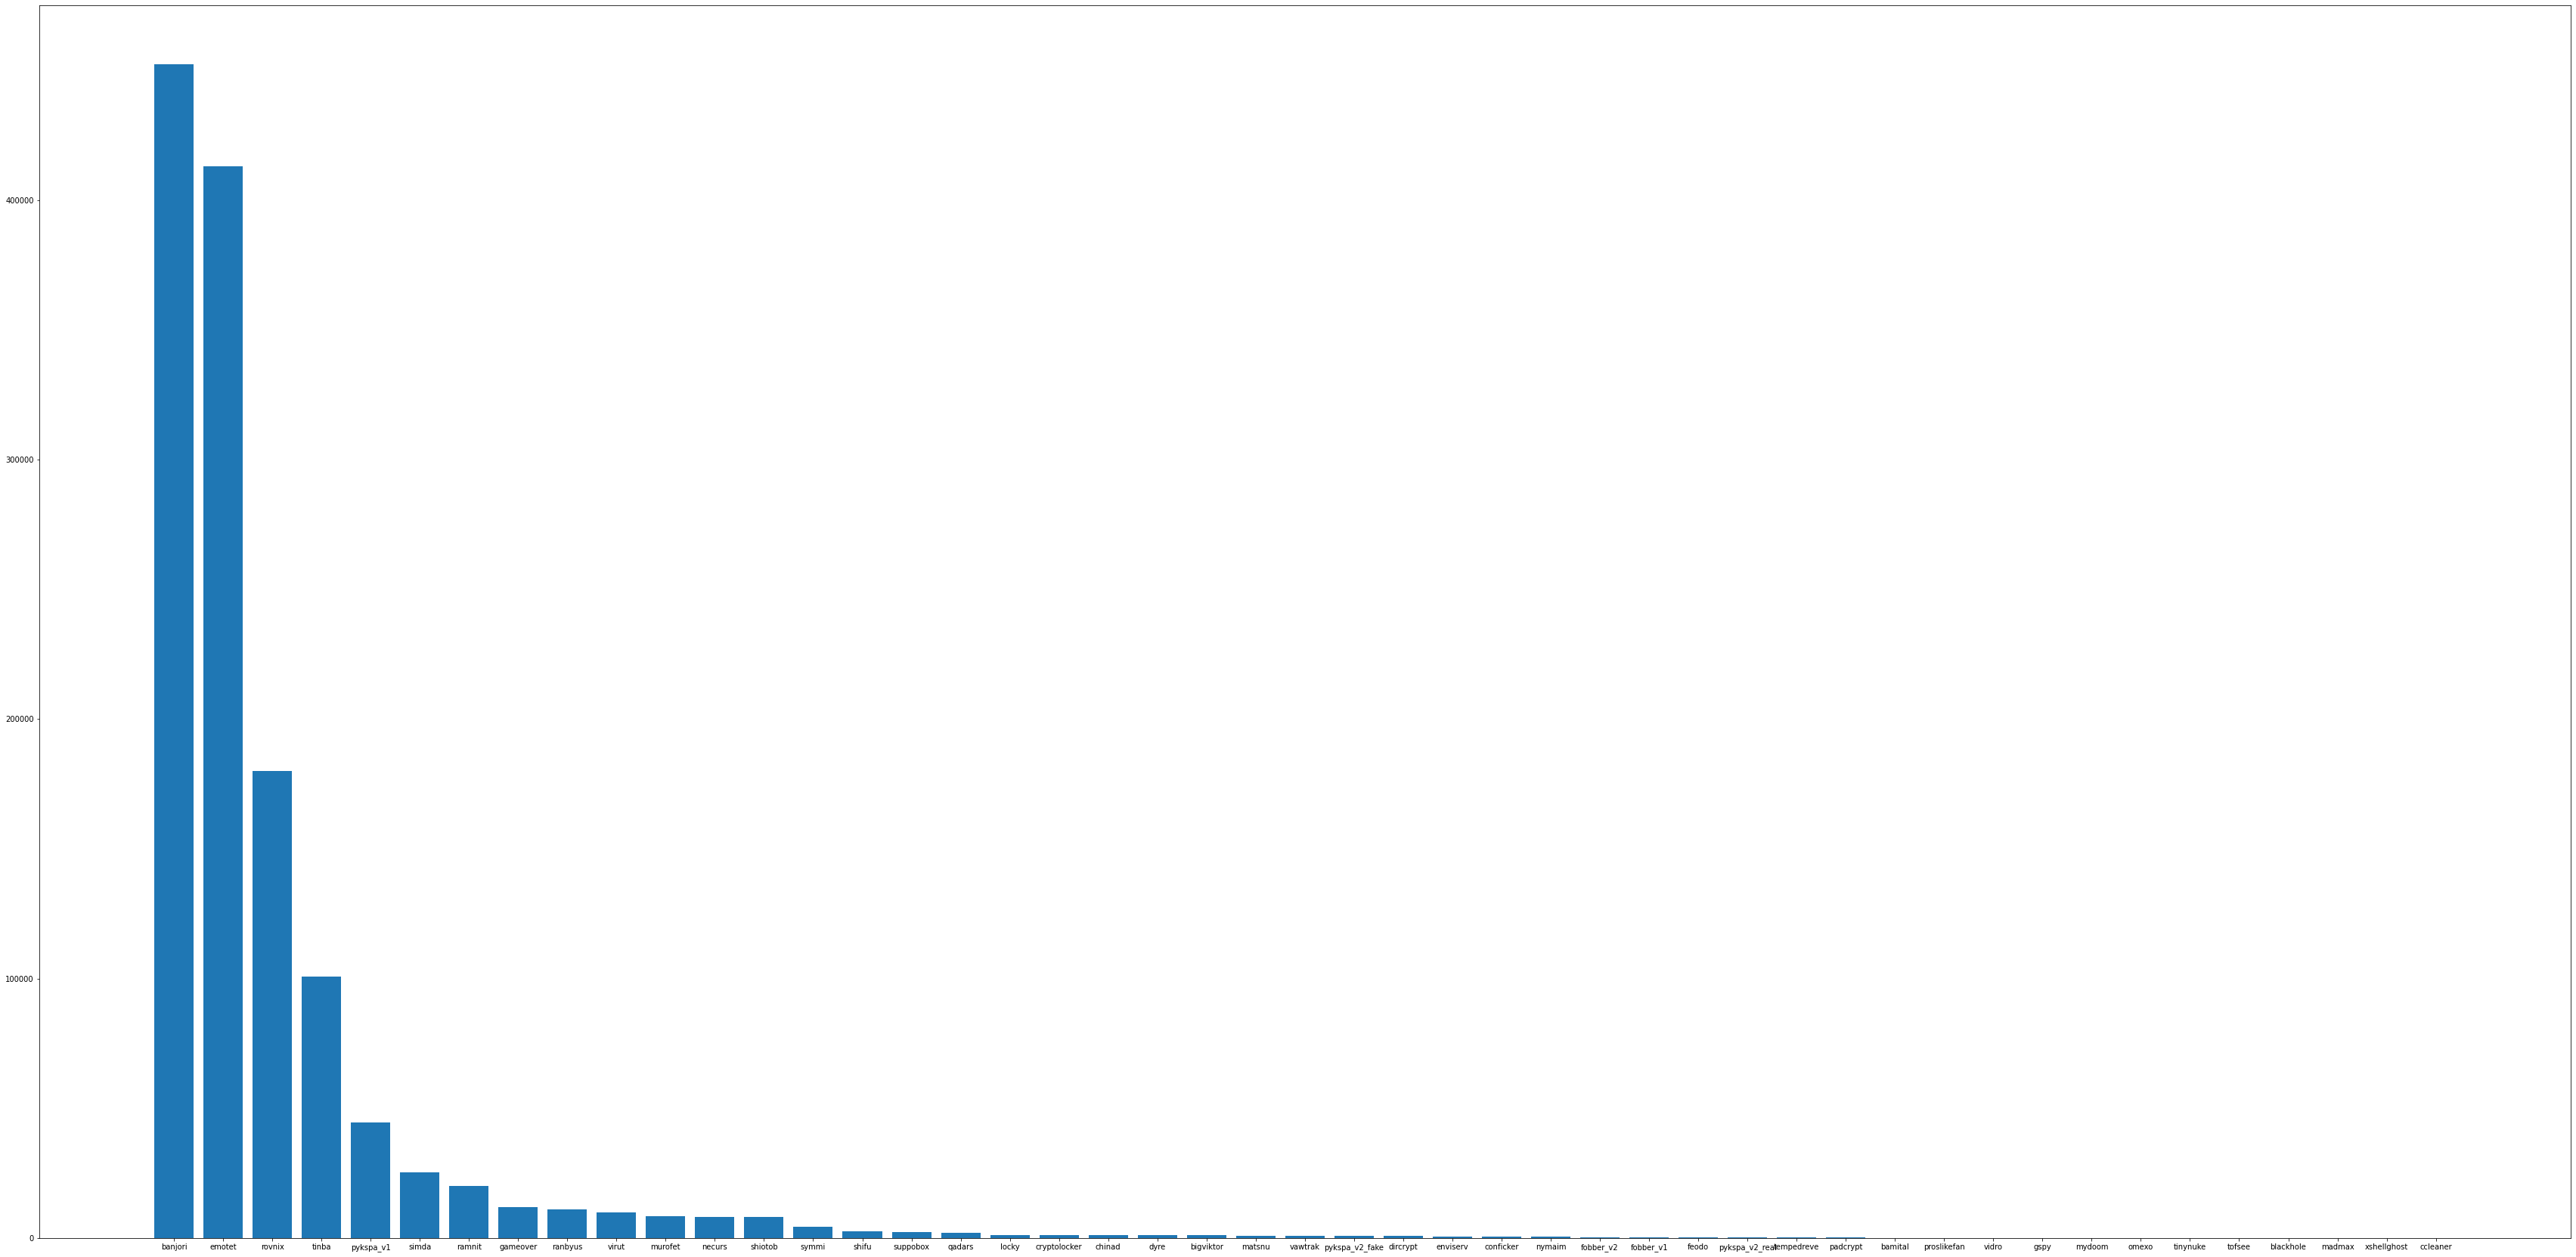

In [4]:
dga_counts = Counter(dga_df.family).most_common()
print(dga_counts)
plt.figure(figsize=(60, 30))
plt.bar([x[0] for x in dga_counts], [x[1] for x in dga_counts]);

## Create labeled dataset
  - Add alexa + dga.
  - Note that the netlab360_dga is class-imbalanced, so that should be accounted for, when creating the training dataset.
    - Mix with other DGA datasets?
    - Pick with 100,000 from the top 4 families (banjori, emotet, rovnix, tinba)

## Extract Features
  - remove TLD (what is special about .ddns.net ?)
  - Which features to extract: i.e. what makes the difference between legit vs malicious?
    - length
    - letter counts: numbers, vowels, etc. (ratio to the total length)
    - n-grams: (n = 3, 4, ...)
    - number of matches with dictionary (what language? length of words?)
  

# Approach
## Considerations
- The method should have low false positive rate: it is important not to detect legitimate domains as DGA
- We should extract enough features, but not too many: too many features can result in over-fitting.
- Ensemble of several methods

# References and Further Reading
 - Domain Generation Algorithms (DGAs) of Malware reimplemented in Python. ([github](https://github.com/baderj/domain_generation_algorithms))
 - Predicting Domain Generation Algorithms with Long Short-Term Memory Networks: ([PDF](https://arxiv.org/abs/1611.00791))
 - netlab 360 DGA Families ([+data](https://data.netlab.360.com/dga/))
